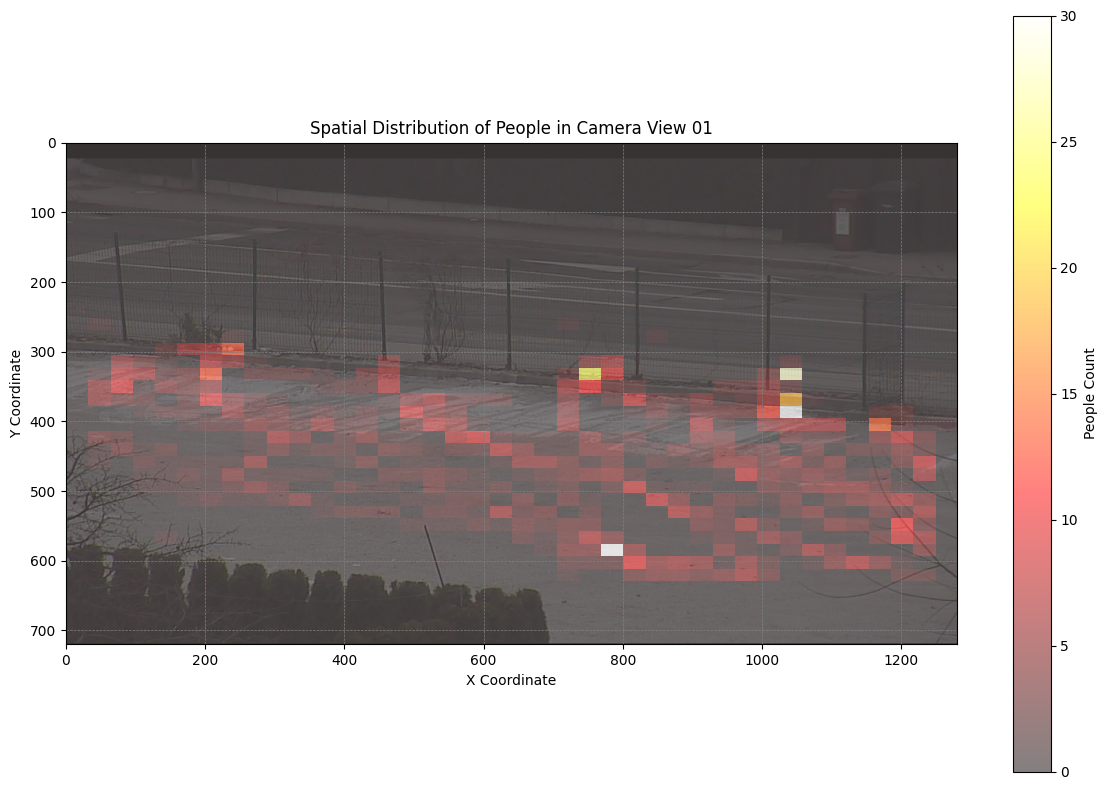

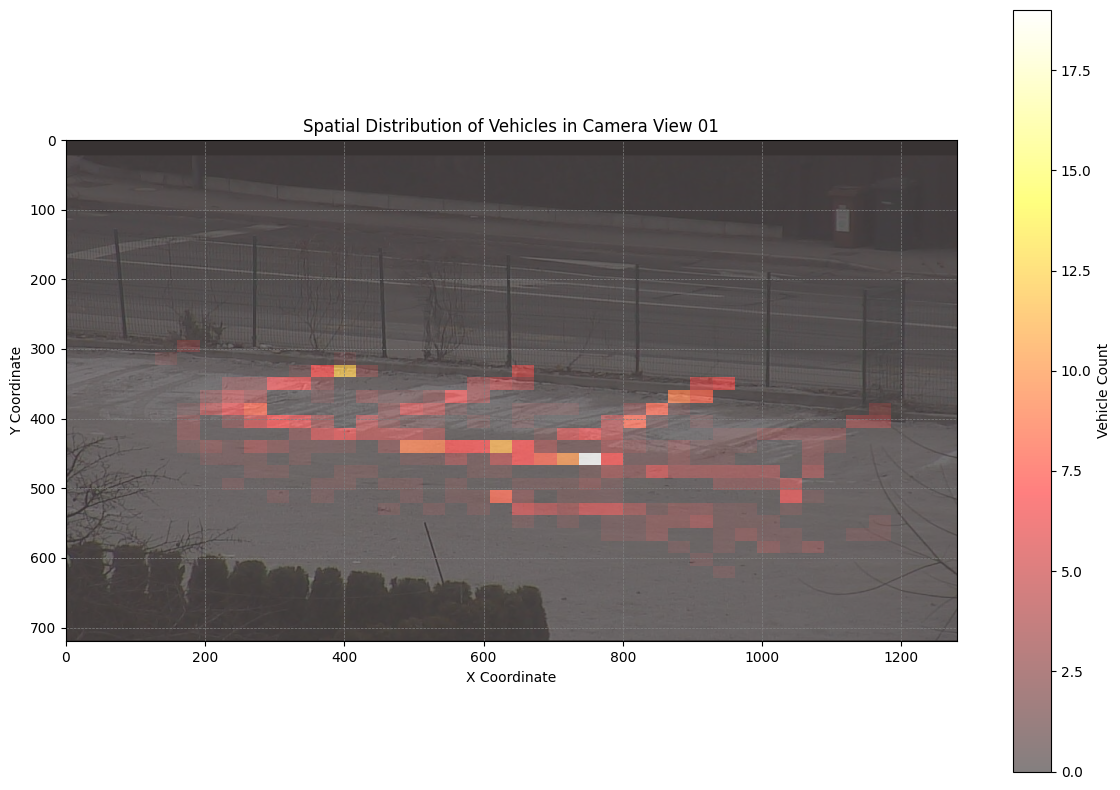

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2  # OpenCV for image processing

# Path to the root 'views' directory containing the 36 directories
root_dir = 'D:/Dataset/dana36/views'
# Path to the backgrounds directory containing the background images
background_dir = 'D:/Dataset/dana36/backgrounds'

# Choose a specific camera view to analyze
selected_view = '01'  # You can change this to any camera view (01 to 36)
annotations_dir = os.path.join(root_dir, selected_view, 'annotations')
background_image_path = os.path.join(background_dir, f'{selected_view}.jpg')

# Load the background image to get the dimensions
background_image = cv2.imread(background_image_path)
if background_image is None:
    raise FileNotFoundError(f'Background image {selected_view}.jpg not found in {background_dir}')
background_image = cv2.cvtColor(background_image, cv2.COLOR_BGR2RGB)
image_height, image_width, _ = background_image.shape

# Grid for spatial distribution
grid_size = 40  # Adjust this value to change the grid size
people_grid = np.zeros((grid_size, grid_size), dtype=np.int32)
vehicle_grid = np.zeros((grid_size, grid_size), dtype=np.int32)

# Loop through each .txt file in the 'annotations' directory in sorted order (frame sequence)
for annotation_file in sorted(os.listdir(annotations_dir)):
    if annotation_file.endswith('.txt'):
        # Read the content of the .txt file
        with open(os.path.join(annotations_dir, annotation_file), 'r') as file:
            lines = file.readlines()

        # Process each line in the annotation file
        for i, line in enumerate(lines):
            values = list(map(int, line.strip().split(',')))
            if values != [0, 0, 0, 0]:  # If bounding box is non-zero
                x_min, y_min, x_max, y_max = values
                x_center = (x_min + x_max) / 2
                y_center = (y_min + y_max) / 2

                # Determine the grid cell
                grid_x = int(x_center / image_width * grid_size)
                grid_y = int(y_center / image_height * grid_size)

                # Update the respective grid based on the object index
                if 0 <= i < 15:  # People (1–15)
                    people_grid[grid_y, grid_x] += 1
                elif 15 <= i < 24:  # Vehicles (16–24)
                    vehicle_grid[grid_y, grid_x] += 1

# Plot the spatial distribution for people
plt.figure(figsize=(12, 8))
plt.imshow(background_image, alpha=0.6)
extent = [0, image_width, image_height, 0]  # Ensures alignment with the background image
plt.imshow(people_grid, cmap='hot', extent=extent, alpha=0.5)
plt.colorbar(label='People Count')
plt.title(f'Spatial Distribution of People in Camera View {selected_view}')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot the spatial distribution for vehicles
plt.figure(figsize=(12, 8))
plt.imshow(background_image, alpha=0.6)
plt.imshow(vehicle_grid, cmap='hot', extent=extent, alpha=0.5)
plt.colorbar(label='Vehicle Count')
plt.title(f'Spatial Distribution of Vehicles in Camera View {selected_view}')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()